## Project : Car Price Prediction Regression


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [87]:
df = pd.read_csv('Car_Price.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


# Data Cleaning

In [5]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

- As there are no null values we can proceed further

# EDA

In [6]:
df['car_brand'] = df['name'].str.split(' ')

In [7]:
df['car_brand'] = df['car_brand'].apply(lambda x: x[0])

In [8]:
df = df.drop(columns=['name'])

In [9]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_brand'],
      dtype='object')

In [10]:
for i in df.select_dtypes('object').columns:
    print(f"Unique values for column {i} :\nNo of Unique values is {df[i].nunique()}\n{df[i].unique()}\n \n")


Unique values for column fuel :
No of Unique values is 5
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
 

Unique values for column seller_type :
No of Unique values is 3
['Individual' 'Dealer' 'Trustmark Dealer']
 

Unique values for column transmission :
No of Unique values is 2
['Manual' 'Automatic']
 

Unique values for column owner :
No of Unique values is 5
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
 

Unique values for column car_brand :
No of Unique values is 29
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']
 



In [11]:
df['car_brand'].value_counts()

car_brand
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

In [12]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


## Visualize

### Univariate Analysis

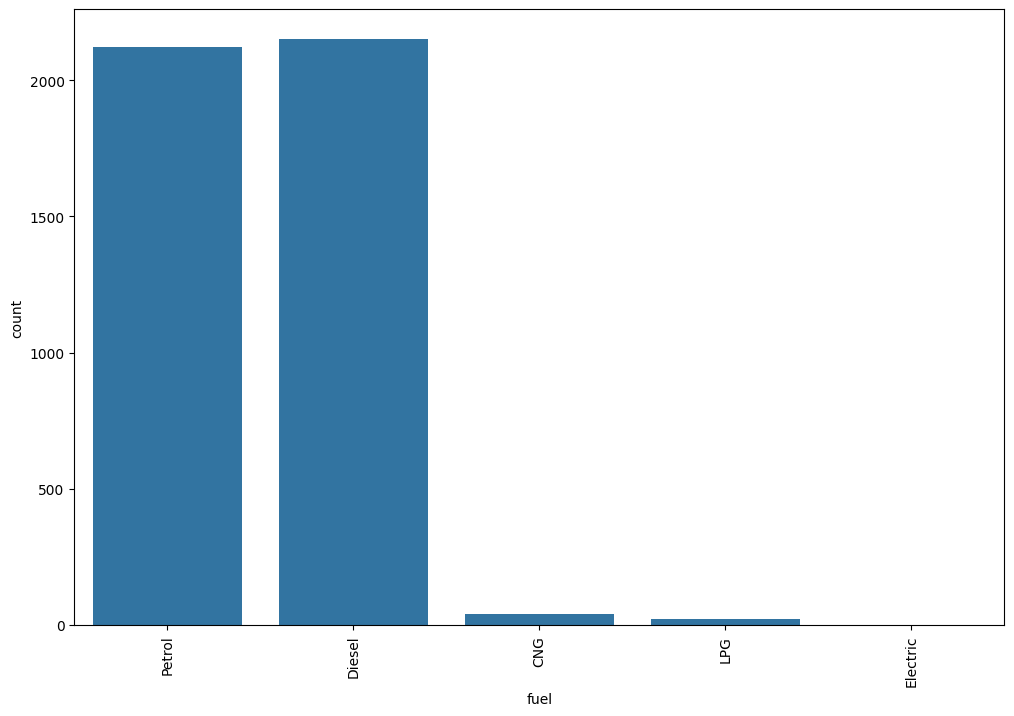

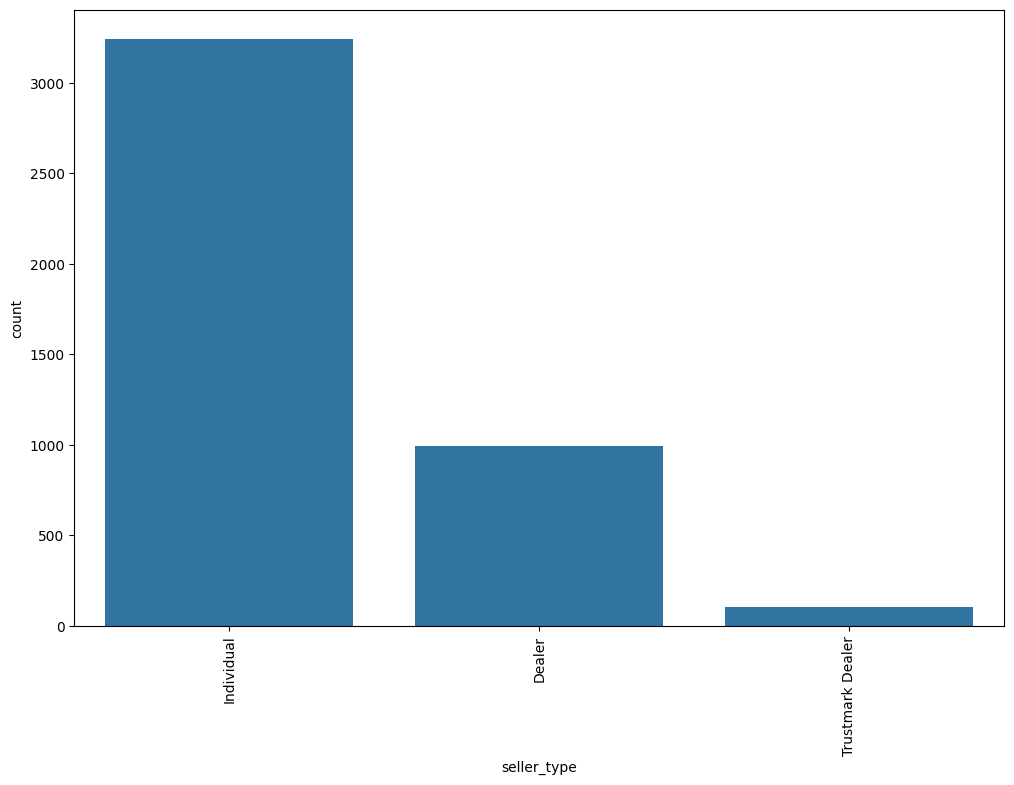

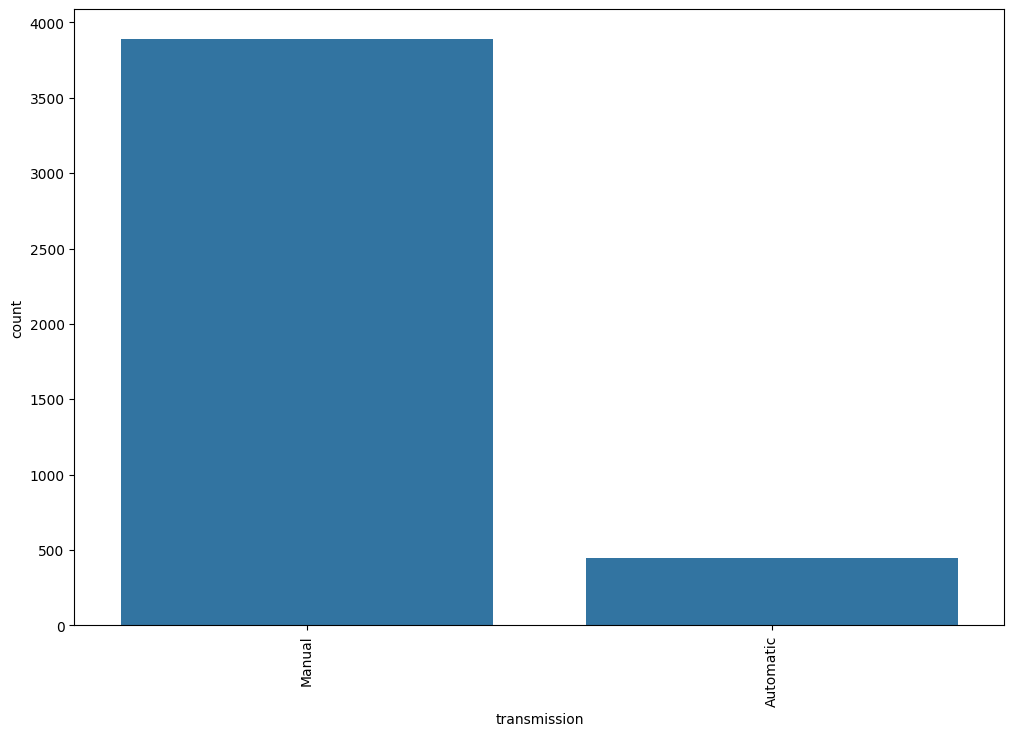

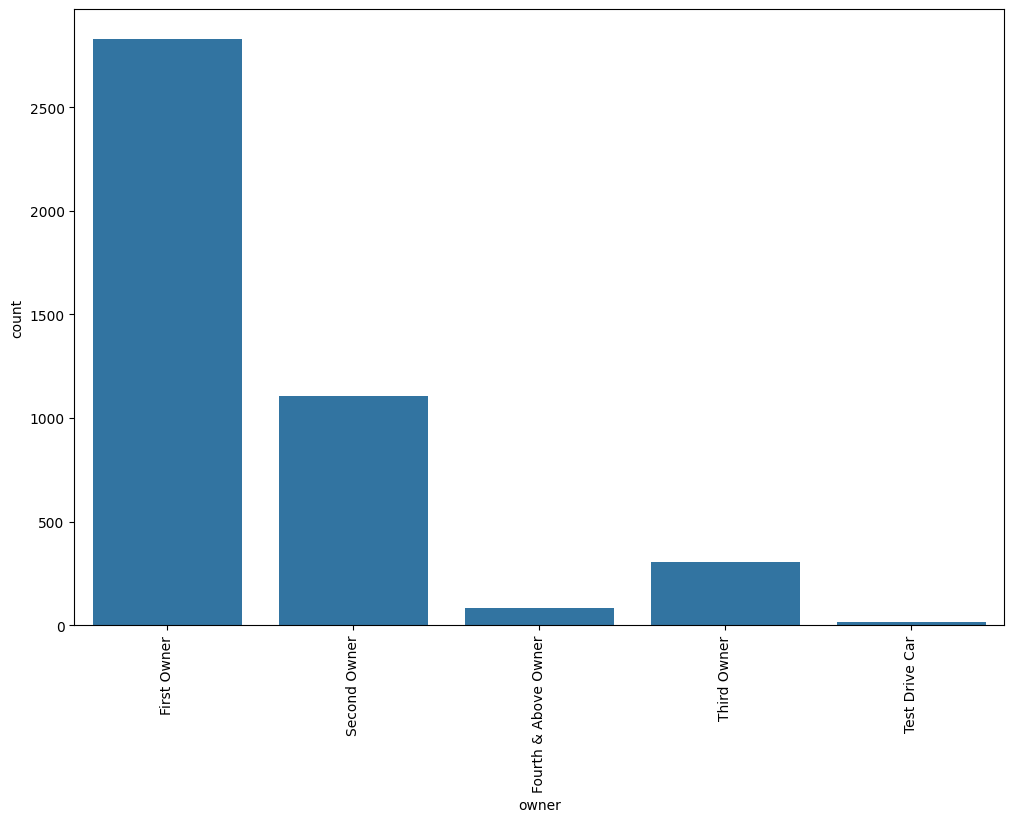

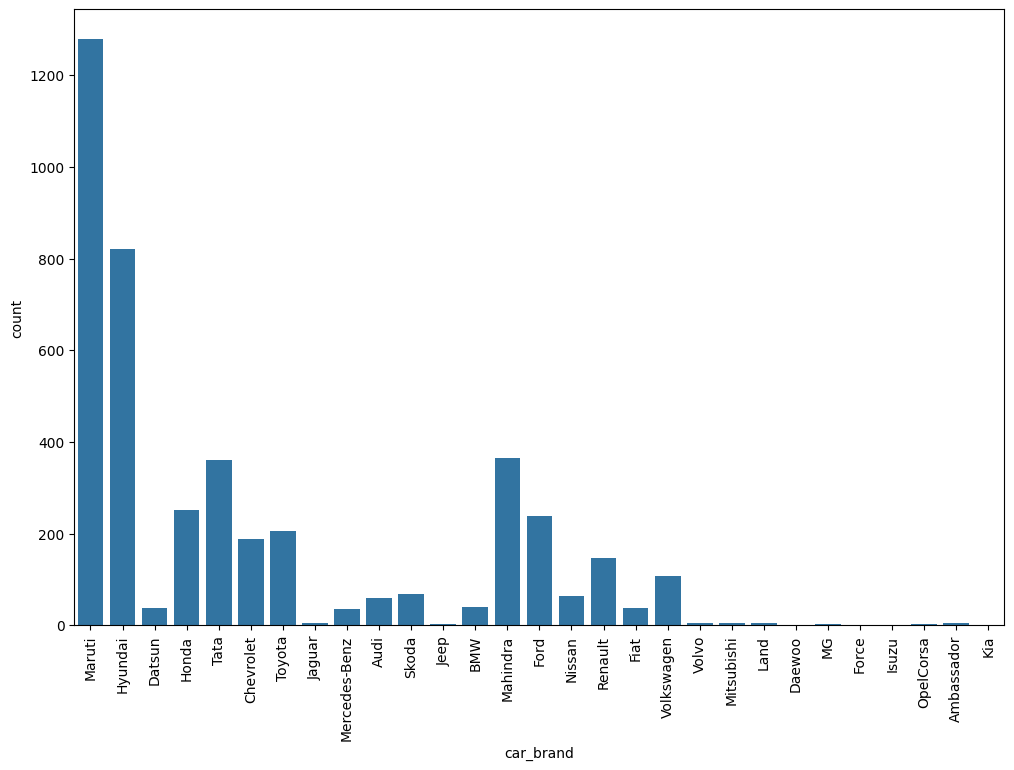

In [13]:
for i in df.select_dtypes('object').columns:
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, x=i)
    plt.xticks(rotation=90)
    plt.show()

#### Observation:
- Major Cars are of Petrol and Diesel
- Most of the Cars are owned by individuals
- Almost all cars are of manual transmission
- Most of the cars are 1st owned.
- The data is dominated by famous brands. Brands like kia, jaguar and Daewoo have very few cars.

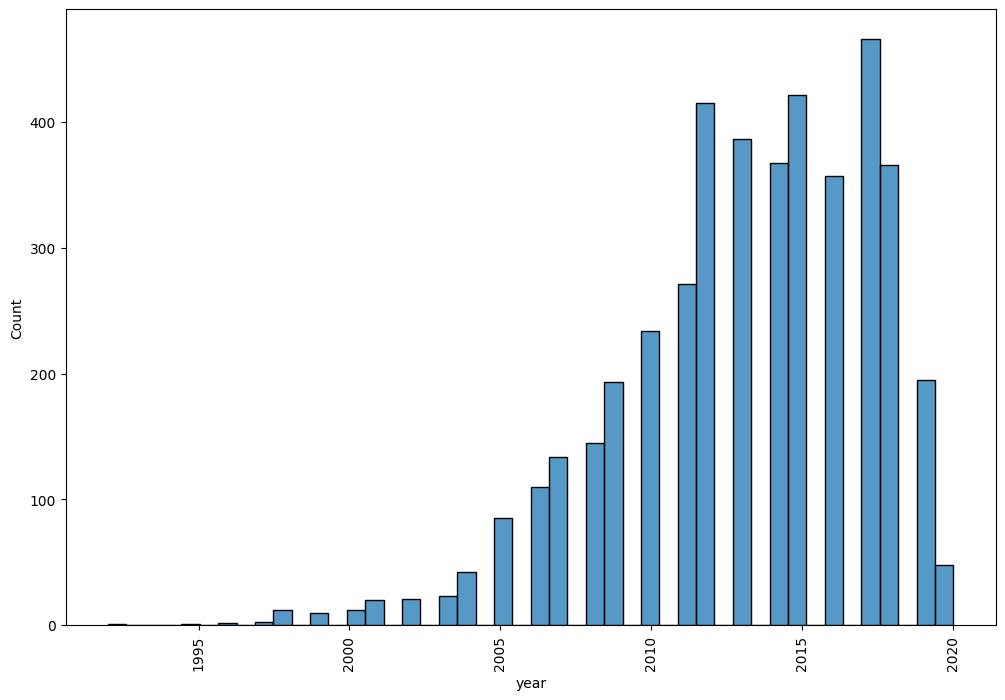

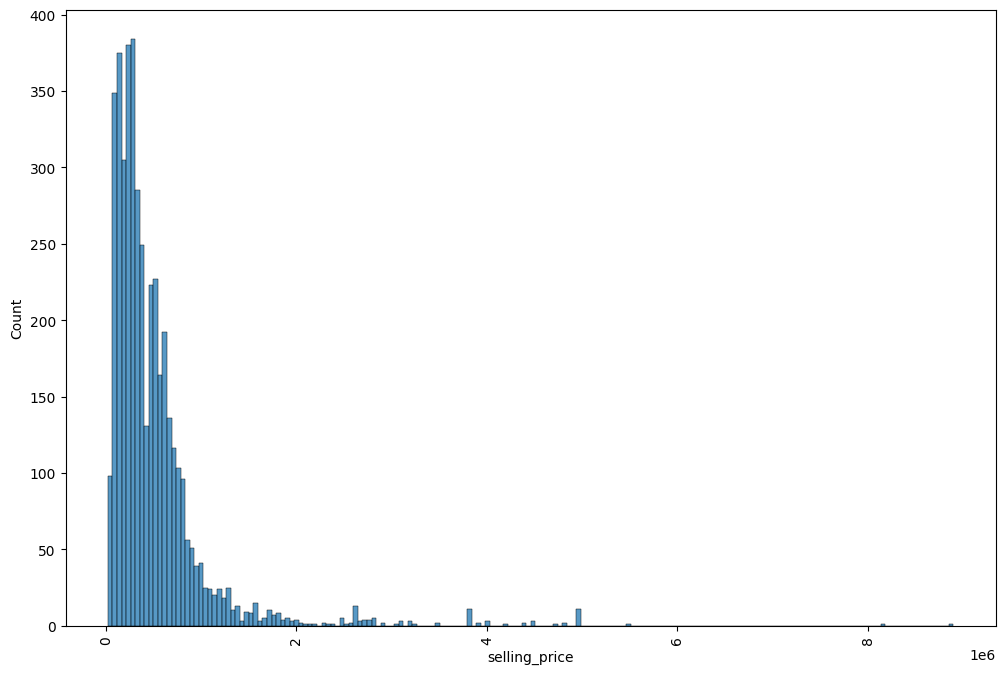

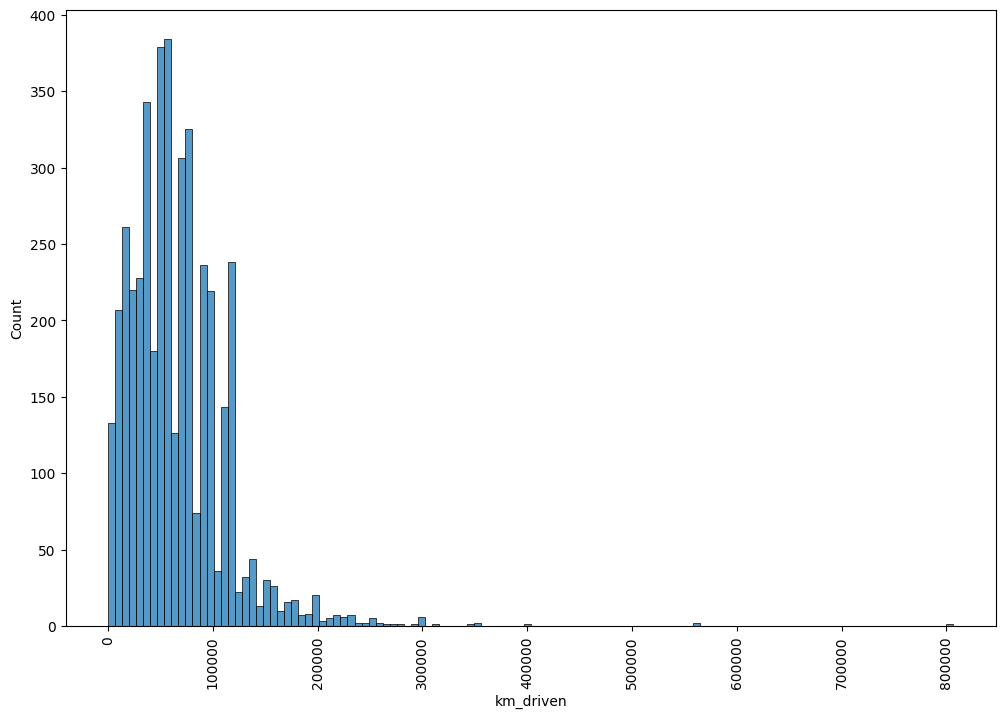

In [14]:
for i in df.select_dtypes('number').columns:
    plt.figure(figsize=(12,8))
    sns.histplot(data=df, x=i)
    plt.xticks(rotation=90)
    plt.show()

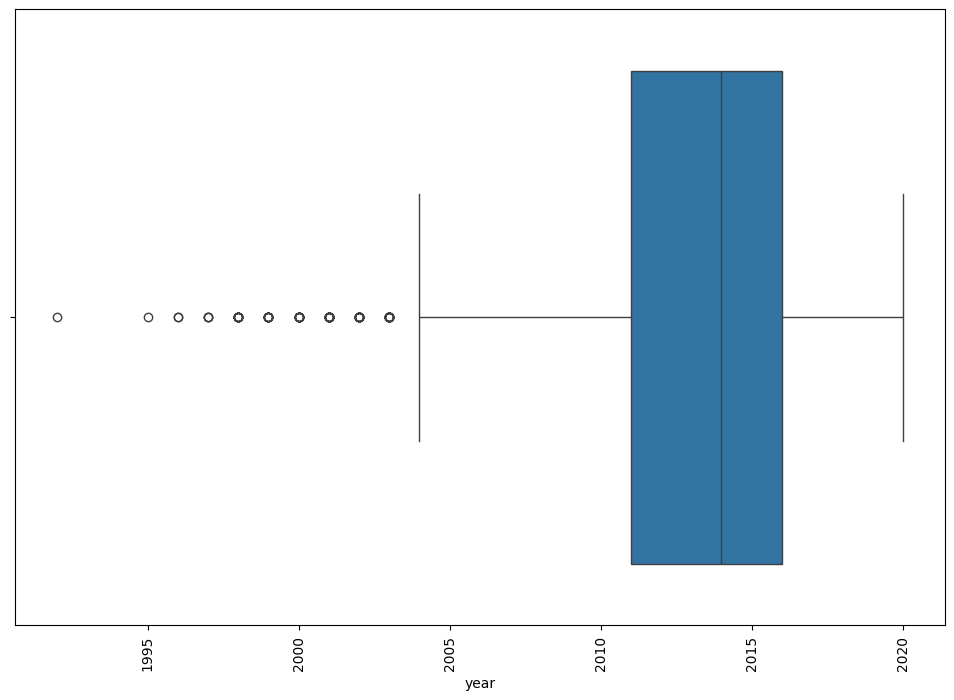

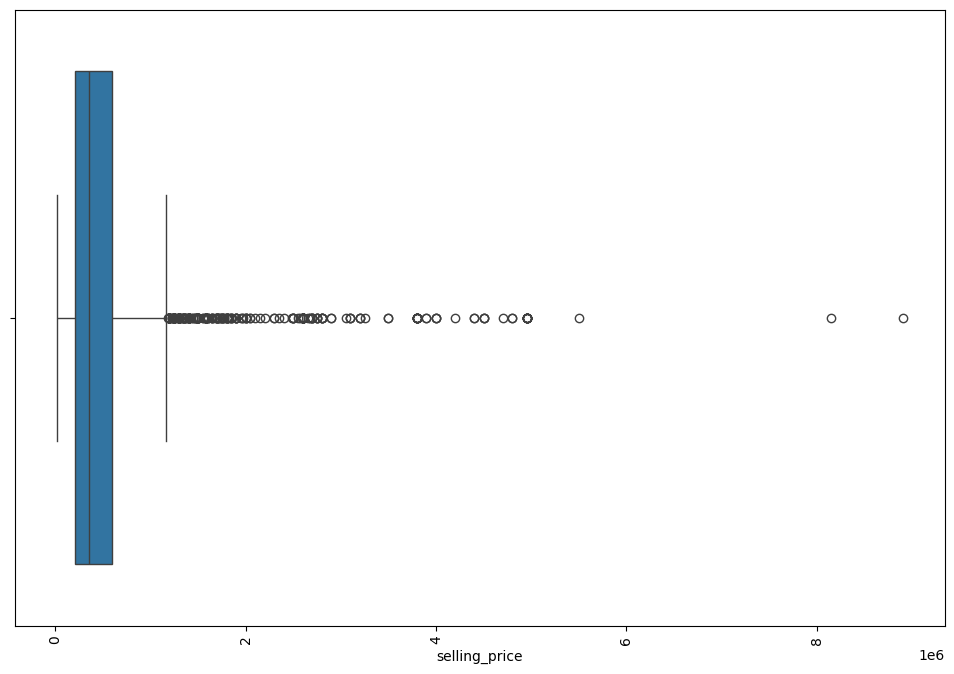

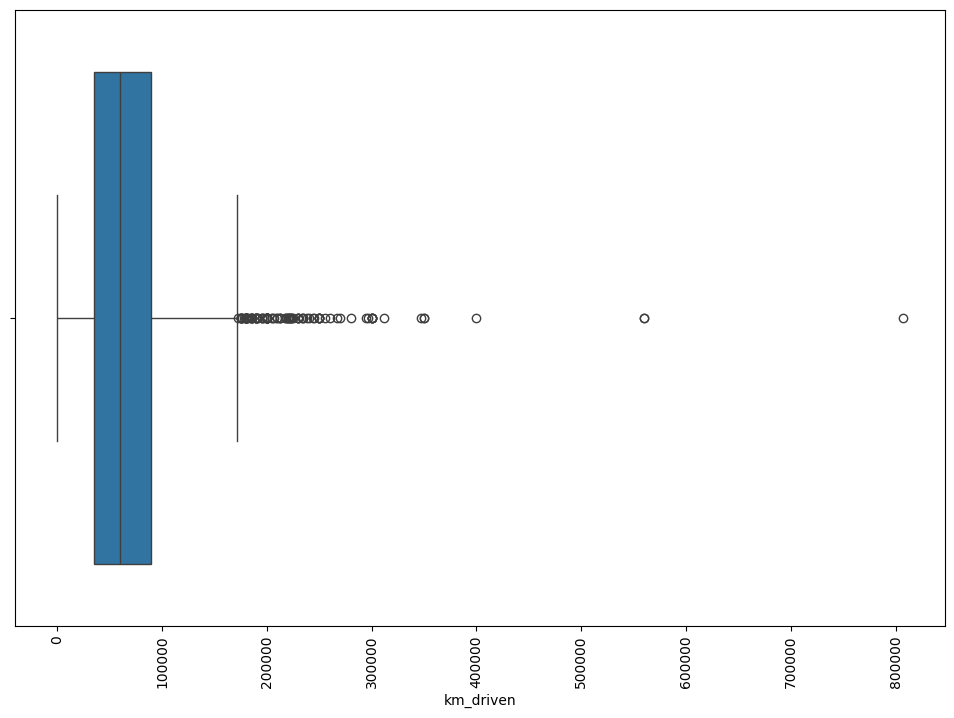

In [15]:
for i in df.select_dtypes('number').columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, x=i)
    plt.xticks(rotation=90)
    plt.show()

#### Observations
- The Year column is left skewed
- The selling price is right skewed and follows a approximately log normal distribution.
- The kilometer driven is right skewed and follows a approximately log normal distribution.
- The KM driven has many outliers that are have very high values
- The Year purchased has outliers that have very low values

### Bivariate Analysis

In [16]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


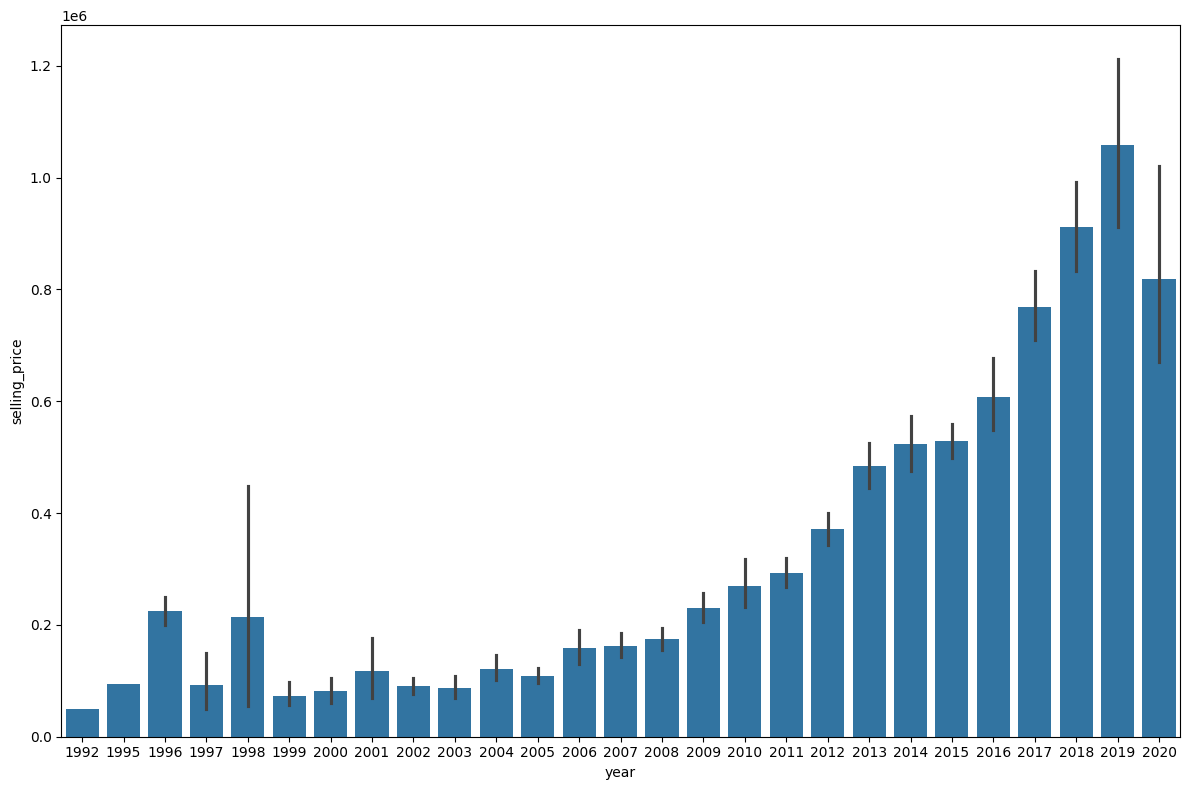

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='year', y = 'selling_price')
plt.tight_layout()
plt.show()

- The Highest sales was recorded in the year 2019
- Lowest sales was recorded in the year 1992
- The sales show a upward trend for sales after year 1999 till year 2019

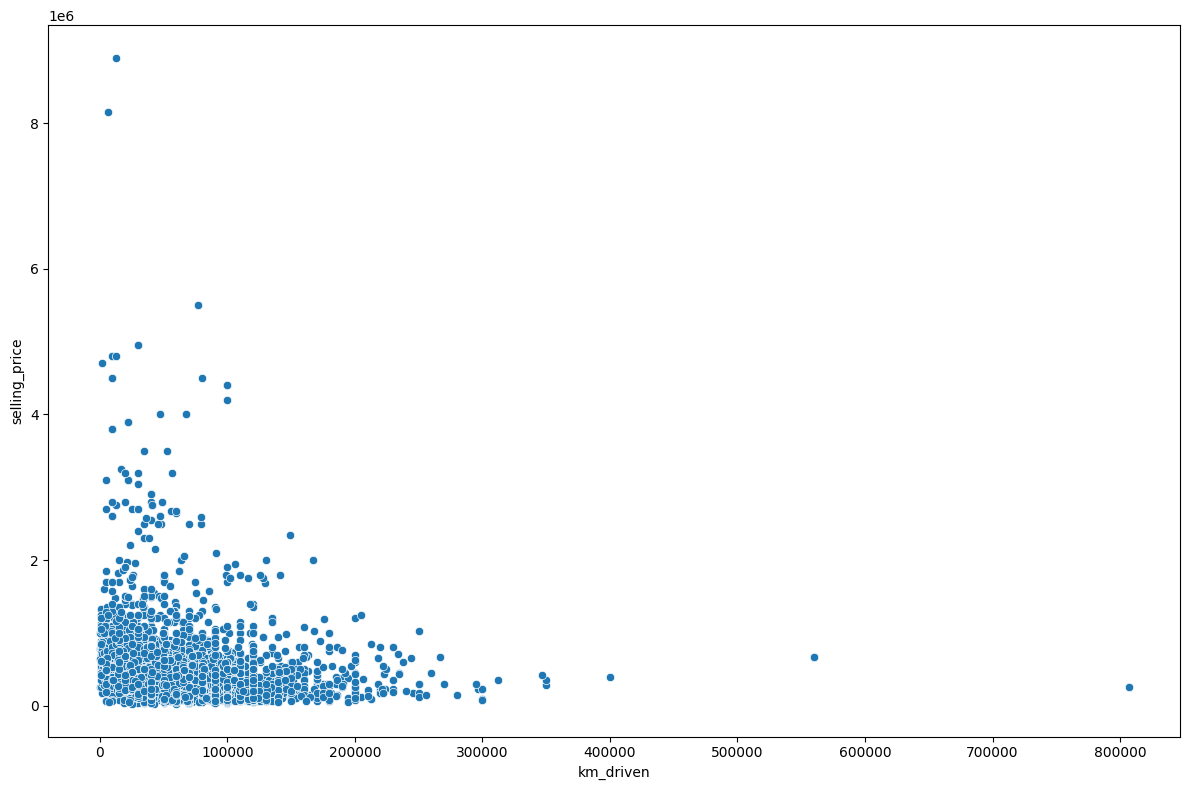

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='km_driven', y = 'selling_price')
plt.tight_layout()
plt.show()

- The data is fairly clustered around lower left corner
- There are cars which have very low selling price but have been driven too much
- There are cars with very high selling price but are not driven at all.

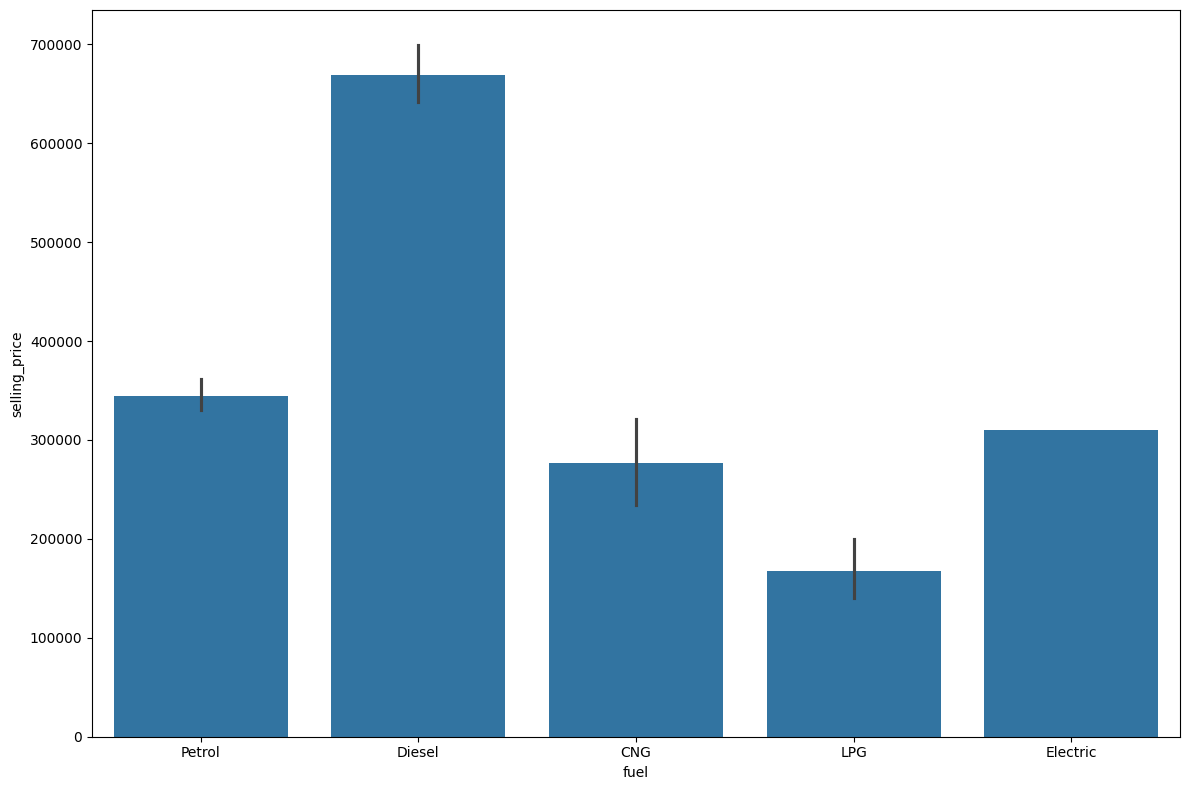

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='fuel', y = 'selling_price')
plt.tight_layout()
plt.show()

- Diesel has the highest selling price.
- Petrol has 2nd highest selling price.
- LPG has lowest price.


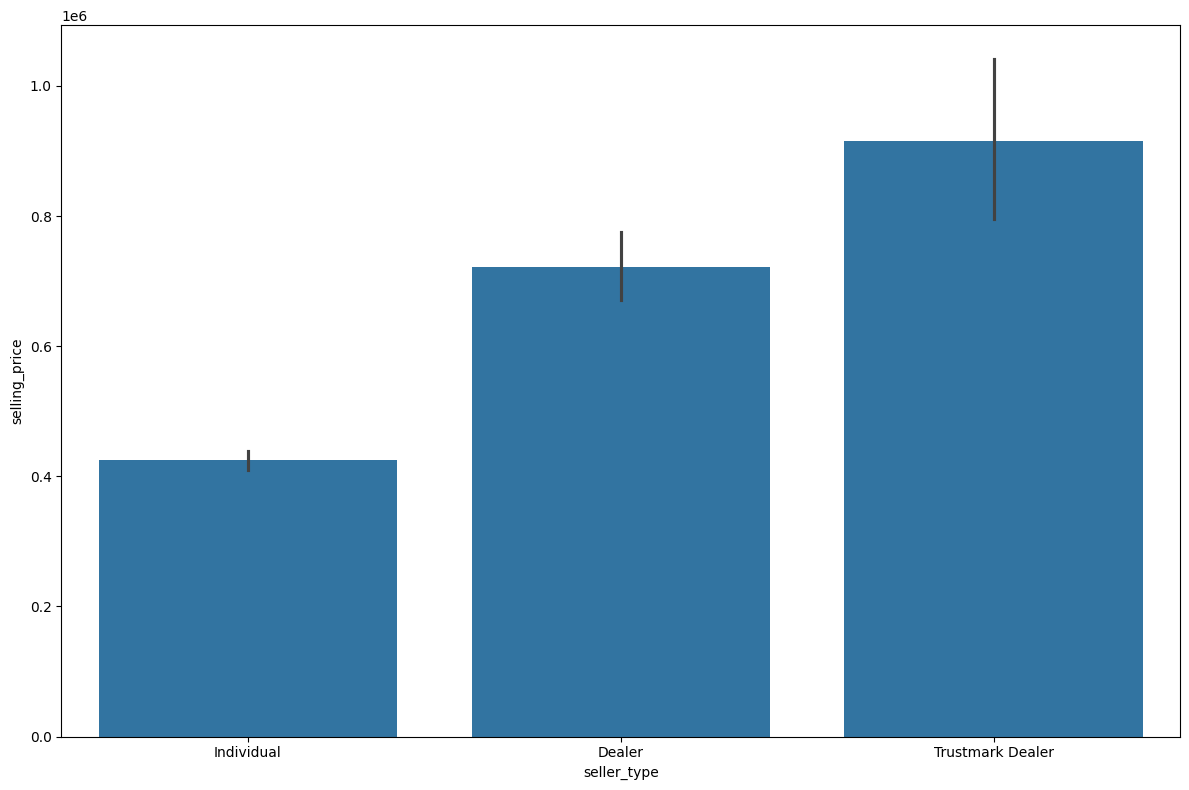

In [20]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='seller_type', y = 'selling_price')
plt.tight_layout()
plt.show()

- Trustmark dealers tend to purchase costly cars
- Individual's tend to buy less costly cars

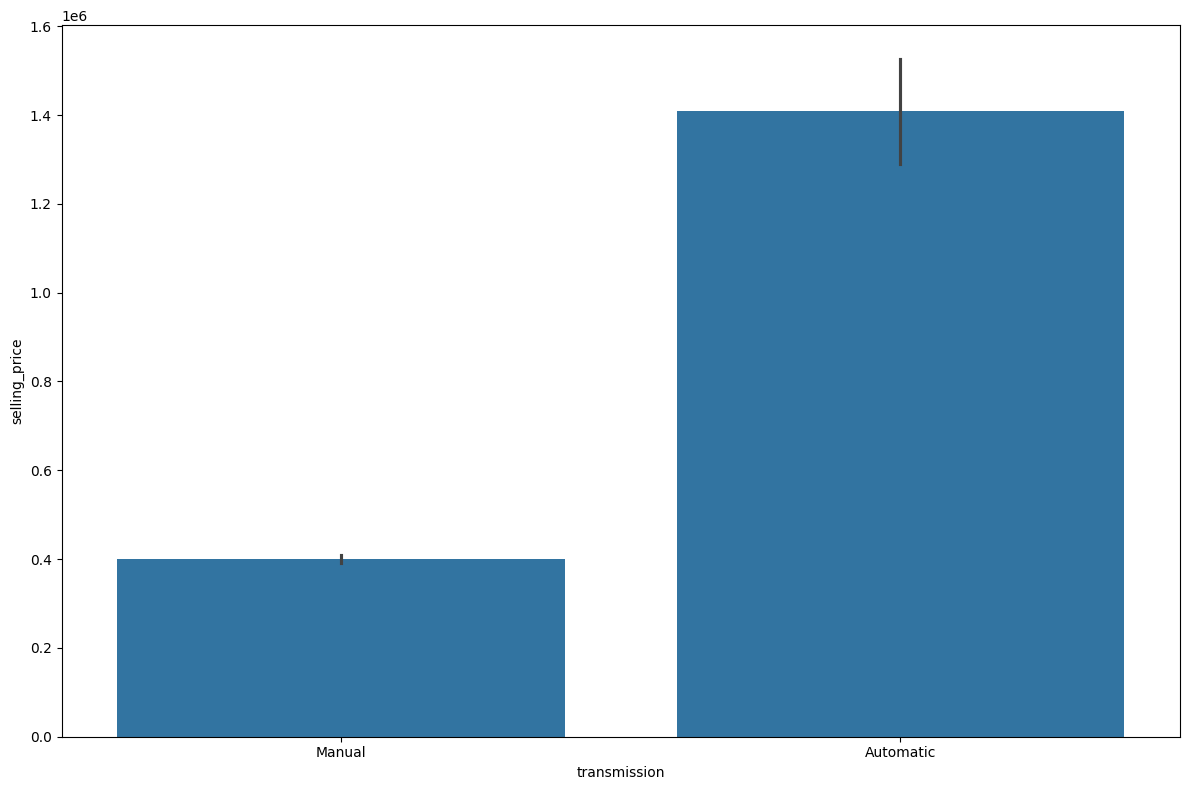

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='transmission', y = 'selling_price')
plt.tight_layout()
plt.show()

In [22]:
df.groupby('transmission')['selling_price'].mean()

transmission
Automatic    1.408154e+06
Manual       4.000667e+05
Name: selling_price, dtype: float64

- The Automatic cars cost almost 4 times the manual

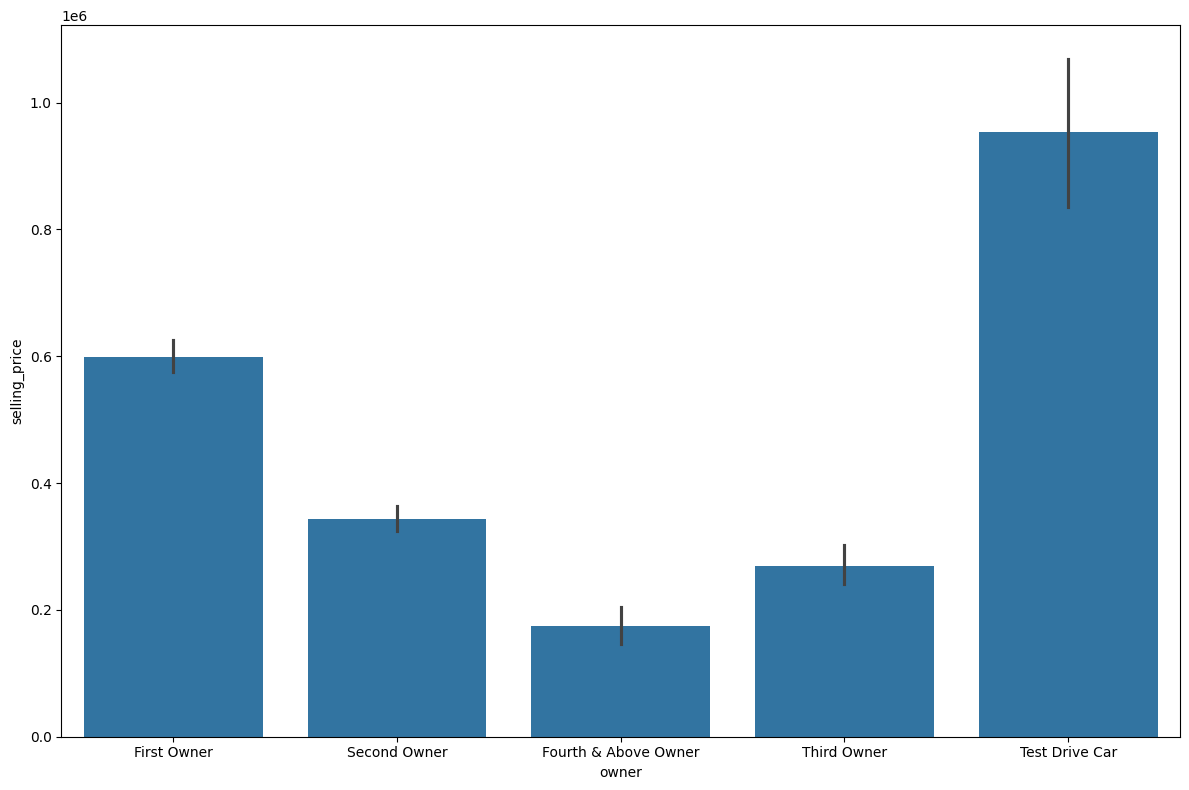

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='owner', y = 'selling_price')
plt.tight_layout()
plt.show()

- The Test drive cars cost the most
- The selling price of decreases as the car goes down to new owners.
- Interestingly The number of test drive cars in dataset is very less as compared to the first owner

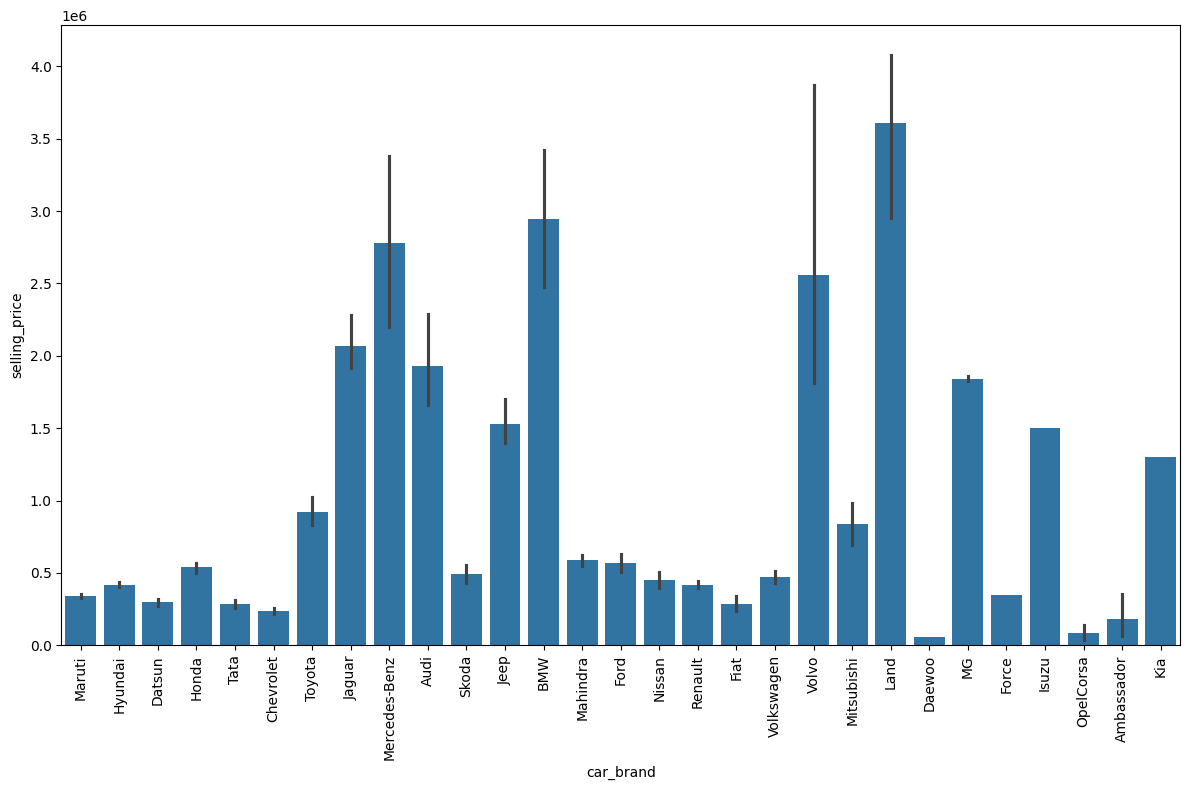

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='car_brand', y = 'selling_price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- The Land brand has the highest selling price
- Daewoo has the lowest selling price
- Famous luxury brands have have higher selling price
- Consumer brands like maruti, hyundai, honda have very low selling price.

### Multivariate Analysis

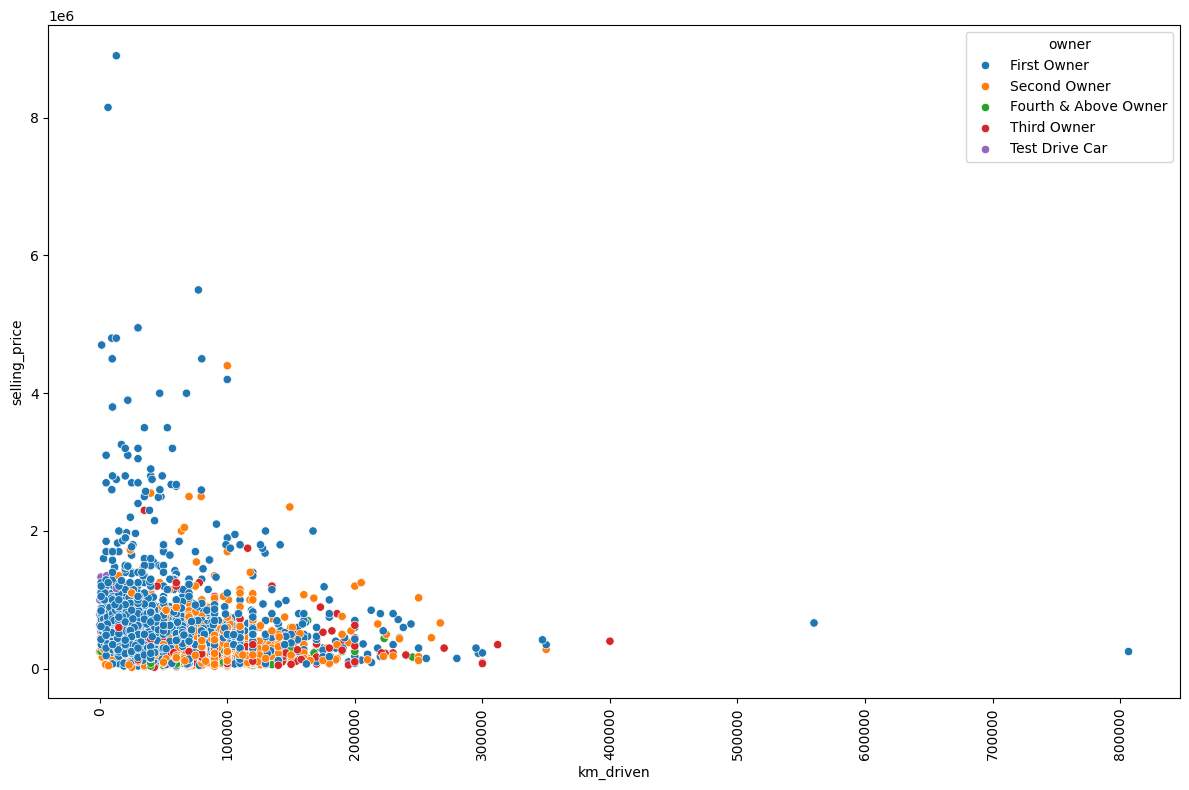

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='km_driven', y = 'selling_price', hue='owner')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Second, Third and Fourth owners cars are more driven compared to first owner

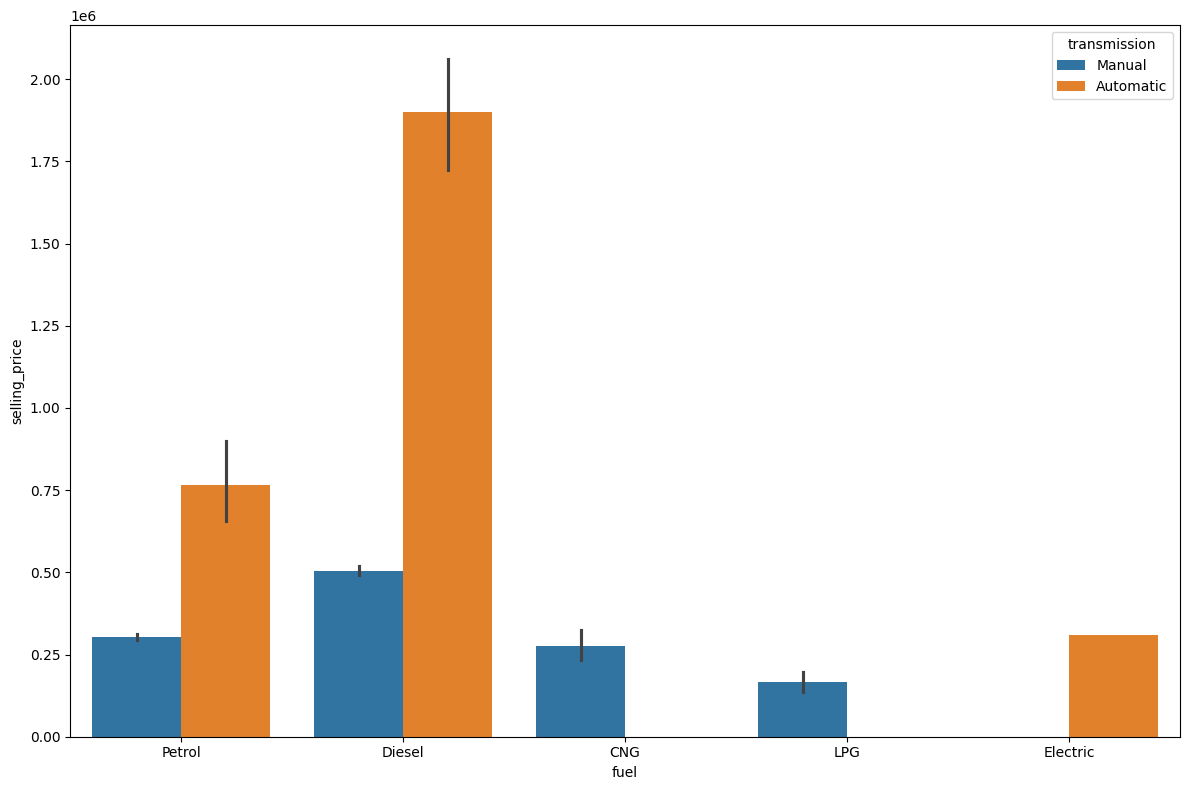

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='fuel', y = 'selling_price', hue='transmission')
plt.tight_layout()
plt.show()

- CNG and LPG do not have Automatic cars
- Automatic Diesel cars are the costliest
- Electric does not have Manual cars

In [27]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


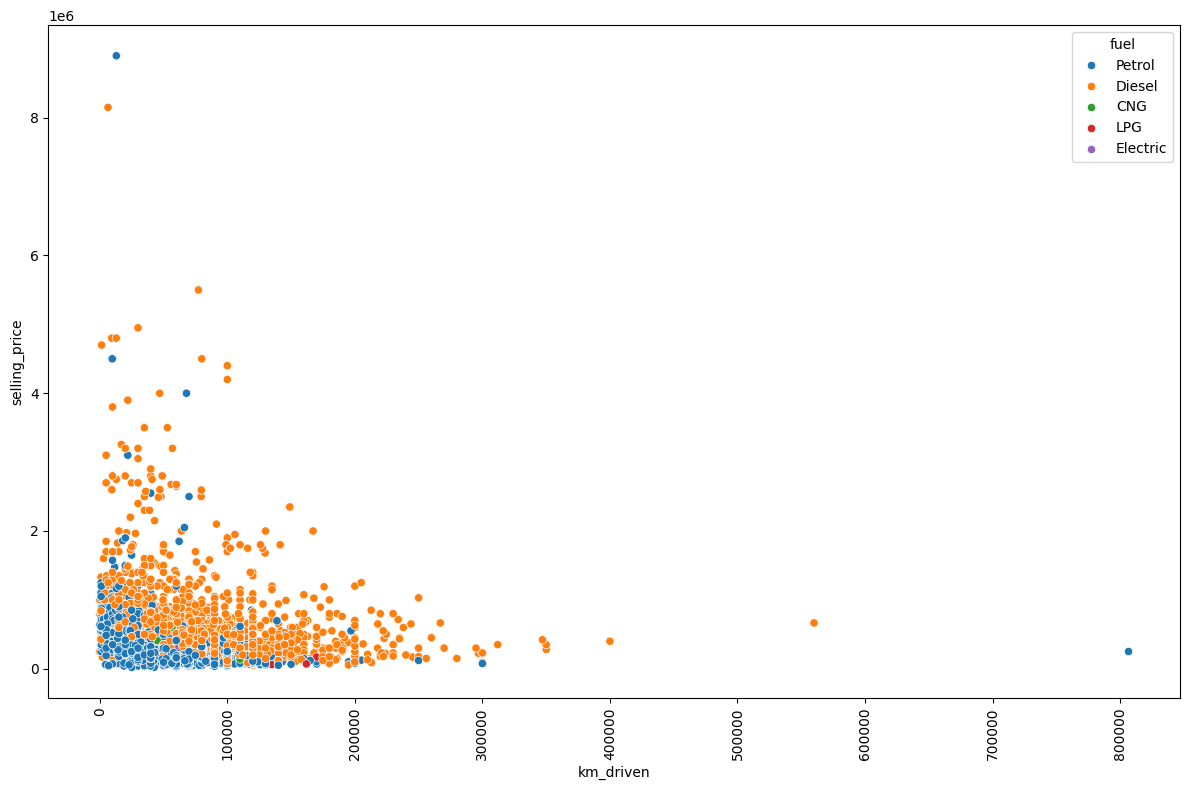

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='km_driven', y = 'selling_price', hue='fuel')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Diesel cars with high price are driven very less

### Correlation Analysis

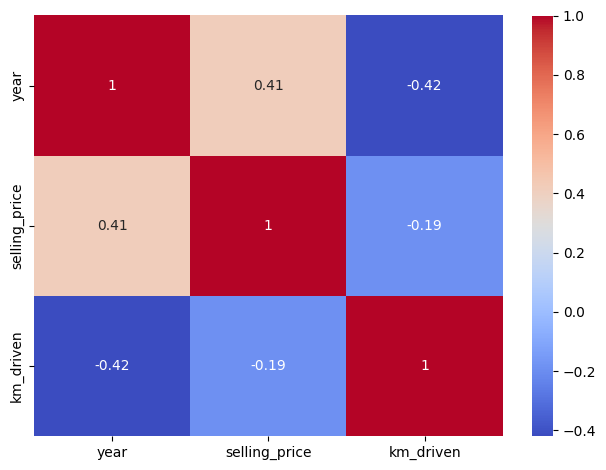

In [29]:
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm')
plt.tight_layout()

- All numerical values have no or moderate correlation
- We do not need to drop any column which will affect the model for multicollinearility

## Outlier Treatment

- We will not remove the outliers from selling price as it is a target variable

#### Year column

In [30]:
print(df['year'].quantile(0.99))
print(df['year'].quantile(0.01))

2020.0
2001.0


In [31]:
print(f"Mean price of cars older than 2001 : {df[(df['year'] < df['year'].quantile(0.01))]['selling_price'].mean()}")
print(f"Mean price of all cars in dataset: {df['selling_price'].mean()}")

Mean price of cars older than 2001 : 125731.70731707317
Mean price of all cars in dataset: 504127.3117511521


In [32]:
len(df[(df['year'] < df['year'].quantile(0.01)) | (df['year'] > df['year'].quantile(0.99))])

41

- The year column has only around 41 outlier values comparing to the boxplot
- We can easily drop the values

In [33]:
df = df[~((df['year'] < df['year'].quantile(0.01)) | (df['year'] > df['year'].quantile(0.99)))]

#### KM driven column

In [34]:
print(df['km_driven'].quantile(0.98))

186000.0


In [35]:
len(df[df['km_driven'] > df['km_driven'].quantile(0.98)])

85

- The values above around 180000 km are outliers
- There are only about 85 rows with outliers.
- We can eaasily drop these values.

In [36]:
df = df[~(df['km_driven'] > df['km_driven'].quantile(0.98))]

## Distributions and Transformations

#### Distributions

In [37]:
for col in df.select_dtypes('number').columns:
    print(f"Skewness for {col} is: {df[col].skew()}")
    print(f"Kurtosis for {col} is: {df[col].kurt()}")
    print()

Skewness for year is: -0.6319017401397883
Kurtosis for year is: -0.12194258037184413

Skewness for selling_price is: 4.865554189646553
Kurtosis for selling_price is: 36.50068069385787

Skewness for km_driven is: 0.5718941328517453
Kurtosis for km_driven is: -0.07659033978689767



- The year column is:
+ ve skew means left skewed a
+ -ve kurtosis but close to 0 means right peaked
- The km_driven column is 
+ +ve skew means right skewed 
+ -ve kurtosis but close to 0 means right peaked
- The selling price has a 
+ +ve skew means right skewed 
+ very high +vs kutosis means it is very peaked curve

#### Transformations

- We transform the km_driven column by taking its sqrt to make is almost normally distributed

In [38]:
df['km_driven'] = np.sqrt(df['km_driven'])

<Axes: >

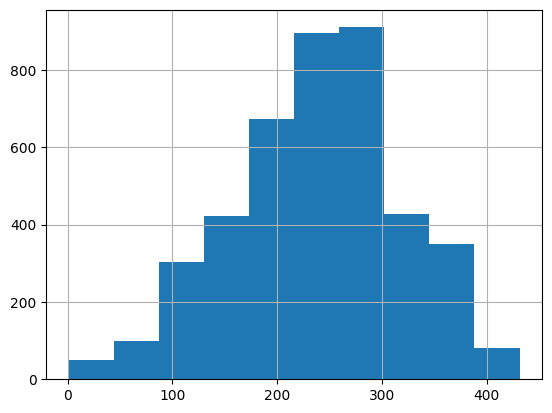

In [39]:
df['km_driven'].hist()

- We transform the selling_price column to log cause it has very right skewed values

<Axes: >

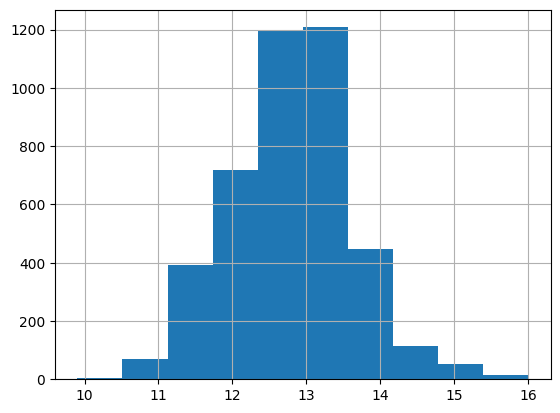

In [40]:
df['selling_price']  = np.log(df['selling_price'])
df['selling_price'].hist()

## Feature Engineering

In [41]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand
0,2007,11.002100,264.575131,Petrol,Individual,Manual,First Owner,Maruti
1,2007,11.813030,223.606798,Petrol,Individual,Manual,First Owner,Maruti
2,2012,13.304685,316.227766,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,12.429216,214.476106,Petrol,Individual,Manual,First Owner,Datsun
4,2014,13.017003,375.499667,Diesel,Individual,Manual,Second Owner,Honda


In [42]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['fuel', 'seller_type', 'transmission', 'owner', 'car_brand'], dtype='object')

In [43]:
df_encoded = pd.get_dummies(df, columns=cat_cols)

In [44]:
df_encoded

,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,...,car_brand_Mercedes-Benz,car_brand_Mitsubishi,car_brand_Nissan,car_brand_OpelCorsa,car_brand_Renault,car_brand_Skoda,car_brand_Tata,car_brand_Toyota,car_brand_Volkswagen,car_brand_Volvo
0,2007,11.002100,264.575131,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2007,11.813030,223.606798,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2012,13.304685,316.227766,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2017,12.429216,214.476106,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2014,13.017003,375.499667,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,12.923910,282.842712,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4336,2014,12.923910,282.842712,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4337,2009,11.608236,288.097206,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4338,2016,13.670485,300.000000,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


## Splitting Data into train and test

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df_encoded.drop(columns=['selling_price'])
y = df_encoded['selling_price']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [48]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(3371, 46) (843, 46)
(3371,) (843,)


## Training a Linear Regression Model

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [50]:
def model_scoring(y_pred, y_test):
    print(f"Mean Absolute Error : {mean_absolute_error(y_pred, y_test)}")
    print(f"Mean Squared Error : {mean_squared_error(y_pred, y_test)}")
    print(f"Root Mean Squared Error : {root_mean_squared_error(y_pred, y_test)}")
    residuals = y_pred - y_test
    residuals = np.abs(residuals)    
    print(f"The difference in prediction and actual values is : {np.sum(residuals)}")
    print(f"R2 Score : {round(r2_score(y_pred, y_test)*100,4)} %")

In [51]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(x_test)

In [53]:
model_scoring(y_pred, y_test)

Mean Absolute Error : 0.2943966791806253
Mean Squared Error : 0.1430760056082375
Root Mean Squared Error : 0.37825389040727325
The difference in prediction and actual values is : 248.17640054926713
R2 Score : 75.9179 %


## Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [55]:
scaler_x = StandardScaler()
x_train_scaled = pd.DataFrame(scaler_x.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler_x.transform(x_test), columns=x_test.columns)

In [56]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.to_numpy().reshape(-1, 1))

In [57]:
x_train_scaled.head()

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,...,car_brand_Mercedes-Benz,car_brand_Mitsubishi,car_brand_Nissan,car_brand_OpelCorsa,car_brand_Renault,car_brand_Skoda,car_brand_Tata,car_brand_Toyota,car_brand_Volkswagen,car_brand_Volvo
0,0.431171,-0.625975,-0.099429,-0.982648,-0.017226,-0.077255,1.014643,1.856672,-1.733079,-0.15986,...,-0.089856,-0.029845,-0.127592,-0.017226,-0.188779,-0.127592,-0.306798,-0.215046,-0.165622,-0.034467
1,0.934018,-1.636090,-0.099429,-0.982648,-0.017226,-0.077255,1.014643,1.856672,-1.733079,-0.15986,...,-0.089856,-0.029845,-0.127592,-0.017226,-0.188779,-0.127592,-0.306798,-0.215046,-0.165622,-0.034467
2,1.436865,-2.516756,-0.099429,-0.982648,-0.017226,-0.077255,1.014643,-0.538598,0.577008,-0.15986,...,-0.089856,-0.029845,-0.127592,-0.017226,-0.188779,-0.127592,-0.306798,-0.215046,-0.165622,-0.034467
3,-2.334486,-1.090278,-0.099429,1.017658,-0.017226,-0.077255,-0.985568,1.856672,-1.733079,-0.15986,...,-0.089856,-0.029845,-0.127592,-0.017226,-0.188779,-0.127592,-0.306798,-0.215046,-0.165622,-0.034467
4,0.179748,0.344073,-0.099429,1.017658,-0.017226,-0.077255,-0.985568,-0.538598,0.577008,-0.15986,...,-0.089856,-0.029845,-0.127592,-0.017226,-0.188779,-0.127592,-0.306798,-0.215046,-0.165622,-0.034467


In [58]:
x_train_scaled.shape

(3371, 46)

In [59]:
x_test_scaled.head()

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,...,car_brand_Mercedes-Benz,car_brand_Mitsubishi,car_brand_Nissan,car_brand_OpelCorsa,car_brand_Renault,car_brand_Skoda,car_brand_Tata,car_brand_Toyota,car_brand_Volkswagen,car_brand_Volvo
0,1.436865,-1.642835,-0.099429,-0.982648,-0.017226,-0.077255,1.014643,-0.538598,0.577008,-0.15986,...,-0.089856,-0.029845,-0.127592,-0.017226,-0.188779,-0.127592,-0.306798,-0.215046,-0.165622,-0.034467
1,-0.323099,0.571358,-0.099429,-0.982648,-0.017226,-0.077255,1.014643,-0.538598,0.577008,-0.15986,...,-0.089856,-0.029845,-0.127592,-0.017226,-0.188779,-0.127592,-0.306798,-0.215046,-0.165622,-0.034467
2,1.185441,-1.188200,-0.099429,-0.982648,-0.017226,-0.077255,1.014643,-0.538598,0.577008,-0.15986,...,-0.089856,-0.029845,-0.127592,-0.017226,-0.188779,-0.127592,-0.306798,-0.215046,-0.165622,-0.034467
3,1.185441,-0.792748,-0.099429,-0.982648,-0.017226,-0.077255,1.014643,-0.538598,0.577008,-0.15986,...,-0.089856,-0.029845,-0.127592,-0.017226,-0.188779,-0.127592,-0.306798,-0.215046,-0.165622,-0.034467
4,-0.574522,0.224330,-0.099429,1.017658,-0.017226,-0.077255,-0.985568,-0.538598,0.577008,-0.15986,...,-0.089856,-0.029845,-0.127592,-0.017226,-0.188779,-0.127592,-0.306798,-0.215046,6.037844,-0.034467


In [60]:
x_test_scaled.shape

(843, 46)

## Prediction Using Models

#### With Scaling

In [61]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train_scaled)
y_pred = lr.predict(x_test_scaled)
model_scoring(y_pred, y_test_scaled)

Mean Absolute Error : 1069788441.261267
Mean Squared Error : 9.647690808943192e+20
Root Mean Squared Error : 31060732137.126442
The difference in prediction and actual values is : 901831655983.248
R2 Score : -0.1188 %


#### Without Scaling

In [62]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
model_scoring(y_pred, y_test)

Mean Absolute Error : 0.2943966791806253
Mean Squared Error : 0.1430760056082375
Root Mean Squared Error : 0.37825389040727325
The difference in prediction and actual values is : 248.17640054926713
R2 Score : 75.9179 %


- The score of 73.3351% will act as a baseline score for all models

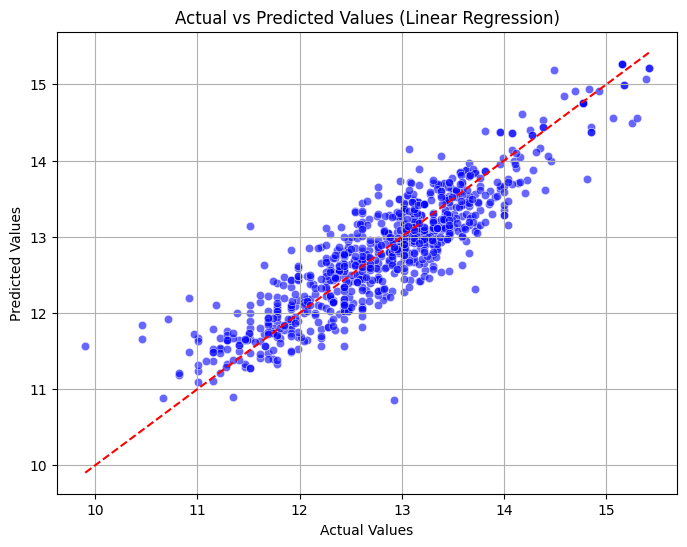

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.grid(True)
plt.show()

- There is a +ve correlation between pred and actual

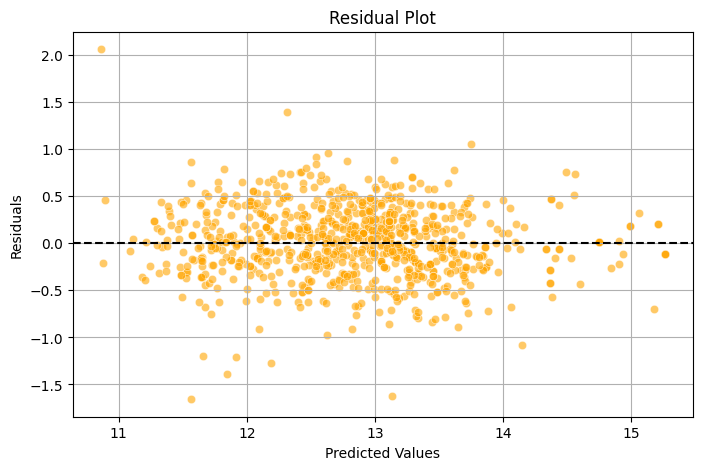

In [64]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, color='orange', alpha=0.6)
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

<Axes: >

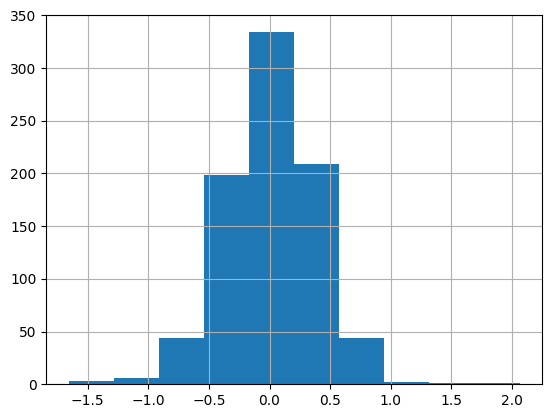

In [65]:
residuals.hist()

- The residuals are also normally distributed which is a very nice thing

## Other Models

In [66]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#### Support Vector Regressor 

In [67]:
svr_w = SVR()
svr_w.fit(x_train_scaled, y_train_scaled.reshape(-1))

print("Training Scores:")
model_scoring(svr_w.predict(x_train_scaled), y_train_scaled.reshape(-1))

print("\nTesting Scores:")
model_scoring(svr_w.predict(x_test_scaled), y_test_scaled.reshape(-1))

Training Scores:
Mean Absolute Error : 0.3014060044956158
Mean Squared Error : 0.16622019617463132
Root Mean Squared Error : 0.4077011113237629
The difference in prediction and actual values is : 1016.0396411547207
R2 Score : 79.7421 %

Testing Scores:
Mean Absolute Error : 0.33235957506372893
Mean Squared Error : 0.20644816694993634
Root Mean Squared Error : 0.4543656753650482
The difference in prediction and actual values is : 280.17912177872347
R2 Score : 76.1977 %


In [69]:
svr_best_params = {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}

svr = SVR(**svr_best_params)
svr.fit(x_train_scaled, y_train_scaled.reshape(-1))

print("Training Scores:")
model_scoring(svr.predict(x_train_scaled), y_train_scaled.reshape(-1))

print("\nTesting Scores:")
model_scoring(svr.predict(x_test_scaled), y_test_scaled.reshape(-1))

Training Scores:
Mean Absolute Error : 0.26682230562053805
Mean Squared Error : 0.14858705729701777
Root Mean Squared Error : 0.3854699174994305
The difference in prediction and actual values is : 899.4579922468338
R2 Score : 83.196 %

Testing Scores:
Mean Absolute Error : 0.33082563577037977
Mean Squared Error : 0.20875915680411858
Root Mean Squared Error : 0.45690169271312464
The difference in prediction and actual values is : 278.88601095443016
R2 Score : 77.5725 %


#### Decision Tree Regressor

In [70]:
dtr_w = DecisionTreeRegressor()
dtr_w.fit(x_train_scaled, y_train_scaled.reshape(-1))

print("Training Scores:")
model_scoring(dtr_w.predict(x_train_scaled), y_train_scaled.reshape(-1))

print("\nTesting Scores:")
model_scoring(dtr_w.predict(x_test_scaled), y_test_scaled.reshape(-1))

Training Scores:
Mean Absolute Error : 0.04930172997900866
Mean Squared Error : 0.02082671920587507
Root Mean Squared Error : 0.1443146534689914
The difference in prediction and actual values is : 166.1961317592382
R2 Score : 97.873 %

Testing Scores:
Mean Absolute Error : 0.35921291209153067
Mean Squared Error : 0.2804608312966955
Root Mean Squared Error : 0.529585527839173
The difference in prediction and actual values is : 302.81648489316035
R2 Score : 72.2114 %


In [72]:
dtr_best_params = {'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': 200, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

dtr = DecisionTreeRegressor(**dtr_best_params)
dtr.fit(x_train_scaled, y_train_scaled.reshape(-1))

print("Training Scores:")
model_scoring(dtr.predict(x_train_scaled), y_train_scaled.reshape(-1))

print("\nTesting Scores:")
model_scoring(dtr.predict(x_test_scaled), y_test_scaled.reshape(-1))

Training Scores:
Mean Absolute Error : 0.2710996923952684
Mean Squared Error : 0.15019984954886553
Root Mean Squared Error : 0.38755625339925237
The difference in prediction and actual values is : 913.8770630644497
R2 Score : 82.8026 %

Testing Scores:
Mean Absolute Error : 0.34942617564120004
Mean Squared Error : 0.24992921714445102
Root Mean Squared Error : 0.499929212133529
The difference in prediction and actual values is : 294.56626606553164
R2 Score : 72.7576 %


#### RandomForestRegressor

In [73]:
rf_w = RandomForestRegressor()
rf_w.fit(x_train_scaled, y_train_scaled.reshape(-1))

print("Training Scores:")
model_scoring(rf_w.predict(x_train_scaled), y_train_scaled.reshape(-1))

print("\nTesting Scores:")
model_scoring(rf_w.predict(x_test_scaled), y_test_scaled.reshape(-1))

Training Scores:
Mean Absolute Error : 0.13978662264215536
Mean Squared Error : 0.04184407002817219
Root Mean Squared Error : 0.2045582313869872
The difference in prediction and actual values is : 471.2207049267057
R2 Score : 95.3339 %

Testing Scores:
Mean Absolute Error : 0.3135059139226663
Mean Squared Error : 0.19185460659612621
Root Mean Squared Error : 0.43801210781909466
The difference in prediction and actual values is : 264.2854854368077
R2 Score : 78.9262 %


In [75]:
rf_best_params = {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500, 'warm_start': True}

rf = RandomForestRegressor(**rf_best_params)
rf.fit(x_train_scaled, y_train_scaled.reshape(-1))

print("Training Scores:")
model_scoring(rf.predict(x_train_scaled), y_train_scaled.reshape(-1))

print("\nTesting Scores:")
model_scoring(rf.predict(x_test_scaled), y_test_scaled.reshape(-1))

Training Scores:
Mean Absolute Error : 0.16510756526379958
Mean Squared Error : 0.052021582086314876
Root Mean Squared Error : 0.2280824019654188
The difference in prediction and actual values is : 556.5776025042684
R2 Score : 93.8583 %

Testing Scores:
Mean Absolute Error : 0.31233315673124107
Mean Squared Error : 0.18272078518771592
Root Mean Squared Error : 0.42745851867487206
The difference in prediction and actual values is : 263.2968511244362
R2 Score : 78.2888 %


#### GradientBoostingRegressor

In [76]:
gb_w = GradientBoostingRegressor()
gb_w.fit(x_train, y_train)

print("Training Scores:")
model_scoring(gb_w.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(gb_w.predict(x_test), y_test)

Training Scores:
Mean Absolute Error : 0.27899355578323926
Mean Squared Error : 0.12519074291565938
Root Mean Squared Error : 0.3538230389836979
The difference in prediction and actual values is : 940.4872765452994
R2 Score : 75.8773 %

Testing Scores:
Mean Absolute Error : 0.29557849890467397
Mean Squared Error : 0.14667292726992537
Root Mean Squared Error : 0.3829790167488623
The difference in prediction and actual values is : 249.17267457664013
R2 Score : 73.5744 %


In [78]:
gb_best_params = {'learning_rate': 0.05, 'loss': 'absolute_error', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 500, 'subsample': 0.9}

gb = GradientBoostingRegressor(**gb_best_params)
gb.fit(x_train, y_train)

print("Training Scores:")
model_scoring(gb.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(gb.predict(x_test), y_test)

Training Scores:
Mean Absolute Error : 0.16047100914295342
Mean Squared Error : 0.06270794030343227
Root Mean Squared Error : 0.25041553526774707
The difference in prediction and actual values is : 540.947771820896
R2 Score : 89.4785 %

Testing Scores:
Mean Absolute Error : 0.2543394824584223
Mean Squared Error : 0.12407922869487069
Root Mean Squared Error : 0.3522488164563093
The difference in prediction and actual values is : 214.40818371245
R2 Score : 79.65 %


#### XGBoost

In [79]:
xgbr_w = XGBRegressor()
xgbr_w.fit(x_train, y_train)

print("Training Scores:")
model_scoring(xgbr_w.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(xgbr_w.predict(x_test), y_test)

Training Scores:
Mean Absolute Error : 0.17270857696494116
Mean Squared Error : 0.05618049625398878
Root Mean Squared Error : 0.23702425245950842
The difference in prediction and actual values is : 582.2006129488167
R2 Score : 90.6238 %

Testing Scores:
Mean Absolute Error : 0.2606556889968427
Mean Squared Error : 0.12144332962210098
Root Mean Squared Error : 0.3484872015183642
The difference in prediction and actual values is : 219.73274582433842
R2 Score : 80.0769 %


In [81]:
xgbr_best_params = {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300, 'subsample': 1.0}

xgbr = XGBRegressor(**xgbr_best_params)
xgbr.fit(x_train, y_train)

print("Training Scores:")
model_scoring(xgbr.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(xgbr.predict(x_test), y_test)

Training Scores:
Mean Absolute Error : 0.1250531452734042
Mean Squared Error : 0.03477836223777197
Root Mean Squared Error : 0.18648957675369413
The difference in prediction and actual values is : 421.5541527166455
R2 Score : 94.415 %

Testing Scores:
Mean Absolute Error : 0.257488694169722
Mean Squared Error : 0.12464295031158318
Root Mean Squared Error : 0.3530480849850105
The difference in prediction and actual values is : 217.06296918507562
R2 Score : 79.8372 %


#### LightGBM

In [82]:
lgbmr_w = LGBMRegressor()
lgbmr_w.fit(x_train, y_train)

print("Training Scores:")
model_scoring(lgbmr_w.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(lgbmr_w.predict(x_test), y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 3371, number of used features: 32
[LightGBM] [Info] Start training from score 12.771702
Training Scores:
Mean Absolute Error : 0.23255834125169997
Mean Squared Error : 0.09165625083954942
Root Mean Squared Error : 0.30274783374873127
The difference in prediction and actual values is : 783.9541683594806
R2 Score : 83.9414 %

Testing Scores:
Mean Absolute Error : 0.27865539797276084
Mean Squared Error : 0.13701211551372944
Root Mean Squared Error : 0.37015147644407614
The difference in prediction and actual values is : 234.90650049103738
R2 Score : 77.4189 %


In [84]:
lgbmr_best_params = {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.8}

lgbmr = LGBMRegressor(**lgbmr_best_params)
lgbmr.fit(x_train, y_train)

print("Training Scores:")
model_scoring(lgbmr.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(lgbmr.predict(x_test), y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 3371, number of used features: 32
[LightGBM] [Info] Start training from score 12.771702
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [91]:
final_result = pd.DataFrame({'Model':[
    "SVR",
    "DecisionTreeRegressor",
    "RandomForestRegressor",
    "GradientBoostingRegressor",
    "XGBoost",
    "LightGBM"
    ], 
'Train Score':[
    svr.score(x_train_scaled, y_train_scaled.reshape(-1))*100,
    dtr.score(x_train_scaled, y_train_scaled.reshape(-1))*100,
    rf.score(x_train_scaled, y_train_scaled.reshape(-1))*100,
    gb.score(x_train, y_train)*100,
    xgbr.score(x_train, y_train)*100,  
    lgbmr.score(x_train, y_train)*100
    ], 
'Test Score':[
    svr.score(x_test_scaled, y_test_scaled.reshape(-1))*100,
    dtr.score(x_test_scaled, y_test_scaled.reshape(-1))*100,
    rf.score(x_test_scaled, y_test_scaled.reshape(-1))*100,
    gb.score(x_test, y_test)*100,
    xgbr.score(x_test, y_test)*100,
    lgbmr.score(x_test, y_test)*100
    ]
})
final_result

,Model,Train Score,Test Score
0,SVR,85.141294,79.573029
1,DecisionTreeRegressor,84.980015,75.544561
2,RandomForestRegressor,94.797842,82.120870
3,GradientBoostingRegressor,90.843935,82.272648
4,XGBoost,94.921967,82.192108
5,LightGBM,89.091847,80.725611


- GradientBoostingRegressor is the best fit model for this data